# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Get & unzip data

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2021-02-18 14:46:44--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Résolution de files.grouplens.org (files.grouplens.org)… 128.101.65.152
Connexion à files.grouplens.org (files.grouplens.org)|128.101.65.152|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 978202 (955K) [application/zip]
Enregistre : «ml-latest-small.zip»

ml-latest-small.zip 100%[===================>] 955,28K  1,32MB/s    ds 0,7s    

2021-02-18 14:46:45 (1,32 MB/s) - «ml-latest-small.zip» enregistré [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


#  Creat Dataframe

In [2]:
csv_file=pd.read_csv("ml-latest-small/ratings.csv")
utility_matrix=csv_file.pivot(index='movieId', columns='userId', values='rating').fillna(0.0)
utility_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create utility matrix & replace unratings by zeros

In [3]:
R = utility_matrix.to_numpy()
print(R.shape)
print(R)

(9724, 610)
[[4.  0.  0.  ... 2.5 3.  5. ]
 [0.  0.  0.  ... 2.  0.  0. ]
 [4.  0.  0.  ... 2.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


# SVD classe

In [4]:
class SVD():
    def __init__(self, M):
        self.M = M
        
    def computeSVD(self,M):
        U, S, VT = np.linalg.svd(self.M, full_matrices=False)
        s=np.diag(S)
        return U, S, VT, s
        
    def plot_singular_values(self,s):
        plt.semilogy(np.diagonal(s))
        plt.title('plot Singular Values')
        plt.show()
        
    def rank_S(self,S):
        print("rank:")
        return len(S)

# SVD Analysis

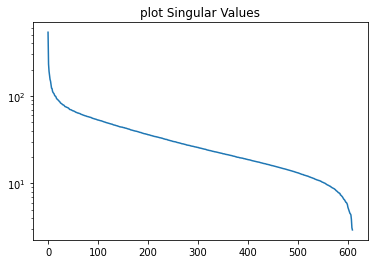

singular values list: 
 [534.41989777 231.23661142 191.1508762  170.42250831 154.552948
 147.33575651 135.65556768 122.66302989 121.44217651 113.11144323
 109.60313933 107.93266172 105.97376877 102.05675293  99.87323589
  99.28999246  97.11713355  93.40879296  92.32408574  90.97607986
  90.42515264  88.83466993  87.29627026  86.05702164  85.15393734
  83.04476272  82.40743887  81.73690785  80.86997674  79.52408732
  79.16948319  78.84651534  78.00723454  76.71225804  75.6272454
  75.40667214  74.96494138  74.29201322  74.05266585  73.45188037
  73.2246949   72.46953282  71.70985332  70.20660519  70.02143448
  69.93495369  69.50676339  69.07855191  68.43455046  67.8676482
  67.49922664  67.48404012  67.06467382  66.58800288  66.0811711
  65.46149276  64.93460662  64.84974658  64.3412403   63.92922187
  63.80270853  63.6549702   63.21158802  63.02672434  62.8347854
  62.30489869  61.71605686  61.54464024  61.24327624  60.80532105
  60.53737166  60.20111326  59.93380272  59.77707611  59.3

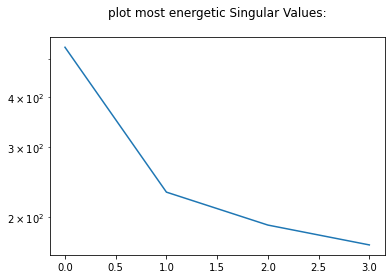

In [5]:
svd=SVD(R)
U, S, VT, s=svd.computeSVD(R)
svd.plot_singular_values(s)

print("singular values list: \n",S,"\n")

#-------------------------------------------------------

# Analyse energy of singular values :

tot_energy=0
for i in S: 
    tot_energy+=pow(i,2)
print("Total energy of singular values",tot_energy,"\n")

i=0
sigma=[]
energy=0
energy_threshold=0.3*tot_energy
while energy<energy_threshold:
    sigma.append(S[i])
    energy+=pow(S[i],2)
    i+=1
    
print("Most energetic singular values having 80% of total energy:")
print((sigma),"\n")
print("Energy =",energy,"\n")
print("Energy ratio",energy/tot_energy)



plt.semilogy(sigma)
plt.title('plot most energetic Singular Values:\n')
plt.show()

# getting non zero values from the original matrix

In [6]:
#getting non zero values from the original matrix:

len_items, len_users = R.shape
dec={}
i_j_R= [ 
            (i, j, R[i][j])
            for i in range(len_items)
            for j in range(len_users)
            if R[i, j] != 0
        ]

list_i=[]
list_j=[]
list_r=[]
#dec_x={}
for i,j, r in i_j_R:
    if i not in list_i:
        list_i.append(i)
    if j not in list_j:
        list_j.append(j)
    list_r.append(r)
    
        


In [17]:
i_j_R_at3=[
    (i,j,R[i][j])
    for i in range(len_items)
    for j in range(len_users)
    if R[i, j] > 3
]

# SGD & RMSE functions

In [25]:
def grad_pT_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda):
    grad_pT=np.zeros((k,len_users))

    for x,i in zip(list_j,list_i):
        grad_pT[:,x]+=2*(Q[i,:].dot(pT[:,x])-R[i,x])*Q[i,:] + 2*lamda*pT[:,x]
    
    grad_pT=grad_pT/(len_users*k)

    return grad_pT
      
    
def grad_Q_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda):
    grad_Q=np.zeros((len_items,k))
    
    for x,i in zip(list_j,list_i):
          grad_Q[i,:]+=2*(Q[i,:].dot(pT[:,x])-R[i,x])*pT[:,x] + 2*lamda*Q[i,:]
    
    grad_Q=grad_Q/(len_items*k)
    
    return grad_Q


    
def gradient_descent(R,len_items,len_users,list_j,list_i,k,learning_rate,iteration,lamda,lamda2):
    Q = np.random.rand(len_items,k)*2
    pT = np.random.rand(k,len_users)*2
    
    for _ in range(iteration):
        pT=pT-learning_rate*grad_pT_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda)
        Q=Q-learning_rate*grad_Q_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda2)
    return Q,pT

def RMSE(R, QpT):
    rmse=0
    for i,j,r in i_j_R:
        rmse+=np.power(QpT[i,j]-R[i,j],2)
    rmse_=np.sqrt(rmse/len(i_j_R))
    
    return rmse_

def precision_func(i_j_R_at3,QpT):
    Tp=0
    for i,j,r in i_j_R_at3:
        if QpT[i,j]>=3:
            Tp+=1
    precision=Tp/len(i_j_R_at3)
    
    return precision
    

# Adjusting parameters and running SGD & RMSE functions

In [27]:
iteration=100
lamda=7.8
lamda2=7.9
learning_rate=0.78
k=5

Q,pT=gradient_descent(R,len_items,len_users,list_j,list_i,k,learning_rate,iteration,lamda,lamda2)
QpT=np.round(Q.dot(pT))
rmse_err=RMSE(R,QpT)
precision_=precision_func(i_j_R,QpT)
print("PRECISION=",precision_)
print("RMSE=",rmse_err)

PRECISION= 0.5245448054266334
RMSE= 1.771818308017223


In [20]:
print(QpT)

[[4. 1. 2. ... 3. 4. 3.]
 [2. 1. 2. ... 1. 1. 3.]
 [3. 1. 2. ... 2. 4. 3.]
 ...
 [3. 0. 1. ... 2. 3. 2.]
 [3. 1. 2. ... 2. 3. 2.]
 [3. 1. 2. ... 2. 4. 3.]]


In [21]:
print(R)

[[4.  0.  0.  ... 2.5 3.  5. ]
 [0.  0.  0.  ... 2.  0.  0. ]
 [4.  0.  0.  ... 2.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [24]:
for i,j,r in i_j_R:
    print(QpT[i,j],R[i,j],r,"\n")

4.0 4.0 4.0 

4.0 4.0 4.0 

2.0 4.5 4.5 

4.0 2.5 2.5 

4.0 4.5 4.5 

5.0 3.5 3.5 

3.0 4.0 4.0 

3.0 3.5 3.5 

3.0 3.0 3.0 

3.0 5.0 5.0 

6.0 3.0 3.0 

3.0 3.0 3.0 

5.0 5.0 5.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

2.0 5.0 5.0 

7.0 4.0 4.0 

2.0 4.0 4.0 

3.0 2.5 2.5 

5.0 5.0 5.0 

3.0 4.5 4.5 

3.0 0.5 0.5 

2.0 4.0 4.0 

2.0 2.5 2.5 

2.0 4.0 4.0 

5.0 3.0 3.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

5.0 3.0 3.0 

5.0 5.0 5.0 

3.0 4.5 4.5 

5.0 4.0 4.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

4.0 3.5 3.5 

5.0 4.0 4.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

5.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

4.0 3.5 3.5 

1.0 5.0 5.0 

3.0 5.0 5.0 

3.0 2.0 2.0 

4.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

5.0 5.0 5.0 

3.0 3.5 3.5 

4.0 4.5 4.5 

3.0 5.0 5.0 

5.0 5.0 5.0 

4.0 4.0 4.0 

5.0 4.0 4.0 

5.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

2.0 4.0 4.0 

5.0 2.0 2.0 

2.0 3.5 3.5 

2.0 5.

2.0 1.0 1.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

1.0 3.5 3.5 

2.0 1.0 1.0 

1.0 2.5 2.5 

1.0 3.5 3.5 

2.0 3.5 3.5 

1.0 3.0 3.0 

2.0 5.0 5.0 

3.0 3.5 3.5 

4.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

2.0 1.5 1.5 

3.0 2.0 2.0 

3.0 4.0 4.0 

2.0 1.0 1.0 

3.0 3.5 3.5 

1.0 3.0 3.0 

1.0 2.5 2.5 

1.0 2.0 2.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 2.0 2.0 

2.0 4.0 4.0 

2.0 1.0 1.0 

2.0 2.0 2.0 

3.0 2.0 2.0 

3.0 2.0 2.0 

3.0 5.0 5.0 

2.0 2.5 2.5 

1.0 3.5 3.5 

4.0 1.0 1.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

1.0 2.0 2.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 1.5 1.5 

3.0 3.5 3.5 

2.0 2.0 2.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 1.0 1.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

2.0 2.0 2.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

2.0 2.0 2.0 

1.0 3.0 3.0 

4.0 3.0 3.0 

3.0 2.0 2.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

2.0 1.0 1.0 

3.0 2.0 2.0 

2.0 2.0 2.0 

1.0 3.0 3.0 

1.0 2.0 2.0 

2.0 2.0 2.0 

0.0 3.5 3.5 

3.0 3.

1.0 3.0 3.0 

1.0 3.0 3.0 

1.0 1.0 1.0 

2.0 3.0 3.0 

2.0 1.0 1.0 

3.0 5.0 5.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

3.0 4.5 4.5 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

1.0 2.0 2.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

4.0 5.0 5.0 

2.0 5.0 5.0 

3.0 3.5 3.5 

3.0 3.5 3.5 

3.0 4.0 4.0 

3.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 3.0 3.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

4.0 5.0 5.0 

2.0 5.0 5.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

3.0 4.5 4.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

1.0 2.0 2.0 

2.0 3.5 3.5 

3.0 3.0 3.0 

2.0 3.5 3.5 

3.0 4.5 4.5 

2.0 2.0 2.0 

2.0 5.0 5.0 

2.0 0.5 0.5 

3.0 5.0 5.0 

3.0 3.0 3.0 

3.0 4.5 4.5 

2.0 5.0 5.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

4.0 3.0 3.0 

2.0 4.5 4.5 

2.0 4.5 4.5 

2.0 5.0 5.0 

3.0 3.5 3.5 

4.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

4.0 4.5 4.5 

2.0 5.0 5.0 

2.0 3.5 3.5 

3.0 5.


4.0 4.0 4.0 

5.0 5.0 5.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

7.0 3.5 3.5 

4.0 5.0 5.0 

4.0 3.0 3.0 

5.0 3.0 3.0 

4.0 5.0 5.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

2.0 2.0 2.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

1.0 3.0 3.0 

3.0 0.5 0.5 

4.0 2.0 2.0 

2.0 4.0 4.0 

5.0 2.0 2.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

7.0 3.5 3.5 

5.0 5.0 5.0 

4.0 3.5 3.5 

3.0 2.0 2.0 

3.0 5.0 5.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 0.5 0.5 

3.0 2.5 2.5 

3.0 4.0 4.0 

1.0 2.0 2.0 

1.0 4.0 4.0 

3.0 2.5 2.5 

3.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

1.0 4.0 4.0 

3.0 2.5 2.5 

2.0 4.0 4.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

2.0 1.0 1.0 

2.0 2.0 2.0 

3.0 3.5 3.5 

3.0 3.0 3.0 

2.0 3.5 3.5 

5.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

3.0 1.0 1.0 

6.0 3.5 3.5 

2.0 3.0 3.0 

4.0 3.0 3.0 

3.0 1.5 1.5 

3.0 2.5 2.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

5.0 4.0 4.0 

4.0 5


2.0 3.5 3.5 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 2.5 2.5 

3.0 3.5 3.5 

3.0 4.0 4.0 

4.0 4.5 4.5 

4.0 4.0 4.0 

5.0 2.0 2.0 

2.0 2.5 2.5 

3.0 4.0 4.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

4.0 2.5 2.5 

4.0 4.0 4.0 

3.0 5.0 5.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

6.0 4.0 4.0 

2.0 4.5 4.5 

4.0 4.0 4.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

5.0 3.5 3.5 

3.0 3.0 3.0 

6.0 4.0 4.0 

4.0 3.0 3.0 

4.0 5.0 5.0 

5.0 5.0 5.0 

4.0 4.0 4.0 

4.0 5.0 5.0 

5.0 5.0 5.0 

4.0 5.0 5.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

5.0 4.0 4.0 

4.0 3.0 3.0 

4.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

5.0 4.0 4.0 

5.0 2.0 2.0 

3.0 4.0 4.0 

6.0 4.0 4.0 

4.0 3.0 3.0 

3.0 5.0 5.0 

5.0 3.5 3.5 

4.0 5.0 5.0 

4.0 4.0 4.0 

5.0 5.0 5.0 

4.0 5.0 5.0 

4.0 3.0 3.0 

5.0 4.0 4.0 

4.0 5.0 5.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

3.0 1.0 1.0 

5.0 4.0 4.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

4.0 2.0 2.0 

5.0 3.5 3.5 

3.0 5.0 5.0 

4.0 3

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

4.0 3.5 3.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 1.0 1.0 

4.0 3.0 3.0 

1.0 2.0 2.0 

2.0 1.0 1.0 

3.0 4.0 4.0 

1.0 2.0 2.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 2.5 2.5 

1.0 2.0 2.0 

3.0 2.0 2.0 

2.0 1.0 1.0 

3.0 4.0 4.0 

2.0 0.5 0.5 

4.0 1.0 1.0 

1.0 4.0 4.0 

3.0 1.0 1.0 

3.0 1.0 1.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

1.0 1.0 1.0 

1.0 2.5 2.5 

1.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

4.0 5.0 5.0 

6.0 3.5 3.5 

3.0 1.0 1.0 

2.0 2.0 2.0 

4.0 1.0 1.0 

4.0 1.5 1.5 

2.0 3.0 3.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

4.0 3.0 3.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.5 4.5 

3.0 5.0 5.0 

2.0 4.5 4.5 

2.0 4.5 4.5 

2.0 3.5 3.5 

3.0 4.0 4.0 

3.0 2.5 2.5 

2.0 5.0 5.0 

3.0 3.5 3.5 

1.0 5.0 5.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.5 4.5 

3.0 4.

2.0 2.0 2.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 2.0 2.0 

1.0 3.0 3.0 

3.0 1.0 1.0 

2.0 2.0 2.0 

5.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 1.0 1.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

2.0 2.5 2.5 

2.0 3.0 3.0 

3.0 3.5 3.5 

4.0 5.0 5.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

4.0 2.5 2.5 

2.0 3.0 3.0 

4.0 3.0 3.0 

4.0 3.0 3.0 

4.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

5.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

3.0 2.5 2.5 

5.0 3.5 3.5 

4.0 2.0 2.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 2.5 2.5 

2.0 2.0 2.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

2.0 1.0 1.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

3.0 5.0 5.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

4.0 4.5 4.5 

3.0 3.5 3.5 

3.0 1.0 1.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.

2.0 5.0 5.0 

3.0 2.0 2.0 

4.0 3.0 3.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

1.0 5.0 5.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 1.0 1.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

2.0 3.5 3.5 

2.0 3.0 3.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

4.0 2.0 2.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

4.0 3.5 3.5 

3.0 4.5 4.5 

2.0 1.0 1.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 1.0 1.0 

2.0 2.0 2.0 

3.0 1.0 1.0 

1.0 3.5 3.5 

2.0 3.5 3.5 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

1.0 2.0 2.0 

2.0 4.0 4.0 

2.0 1.5 1.5 

1.0 5.0 5.0 

1.0 3.0 3.0 

2.0 2.0 2.0 

2.0 3.5 3.5 

1.0 4.0 4.0 

1.0 1.0 1.0 

3.0 2.5 2.5 

1.0 3.5 3.5 

0.0 3.0 3.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

4.0 1.5 1.5 

1.0 4.0 4.0 

2.0 3.0 3.0 

4.0 1.0 1.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

3.0 2.


2.0 1.0 1.0 

2.0 1.0 1.0 

2.0 3.0 3.0 

1.0 2.0 2.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

5.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

2.0 1.0 1.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

1.0 2.5 2.5 

3.0 3.0 3.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

2.0 3.5 3.5 

4.0 2.5 2.5 

3.0 3.0 3.0 

4.0 4.0 4.0 

4.0 2.0 2.0 

4.0 5.0 5.0 

5.0 1.0 1.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

3.0 1.0 1.0 

4.0 3.5 3.5 

5.0 5.0 5.0 

3.0 4.0 4.0 

5.0 1.0 1.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

5.0 4.5 4.5 

2.0 5.0 5.0 

3.0 5.0 5.0 

3.0 4.5 4.5 

5.0 5.0 5.0 

5.0 4.0 4.0 

6.0 3.5 3.5 

4.0 4.5 4.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

5.0 4.5 4.5 

1.0 5.0 5.0 

2.0 5.0 5.0 

3.0 3.5 3.5 

1.0 5.0 5.0 

1.0 4.0 4.0 

3.0 1.0 1.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

2.0 4.5 4.5 

2.0 5.0 5.0 

2.0 3.5 3.5 

2.0 2.0 2.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

2.0 3.5 3.5 

1.0 4.5 4.5 

2.0 4.0 4.0 

2.0 4


6.0 4.0 4.0 

3.0 3.0 3.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

4.0 2.0 2.0 

2.0 2.0 2.0 

4.0 1.0 1.0 

2.0 2.0 2.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 2.0 2.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

6.0 3.0 3.0 

3.0 2.0 2.0 

5.0 3.0 3.0 

5.0 2.0 2.0 

3.0 3.0 3.0 

5.0 4.0 4.0 

4.0 3.0 3.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

7.0 4.0 4.0 

3.0 5.0 5.0 

5.0 5.0 5.0 

5.0 3.0 3.0 

5.0 3.0 3.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

2.0 5.0 5.0 

4.0 3.5 3.5 

3.0 3.0 3.0 

6.0 4.0 4.0 

3.0 5.0 5.0 

2.0 1.5 1.5 

3.0 4.5 4.5 

4.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

1.0 3.0 3.0 

4.0 3.0 3.0 

4.0 4.0 4.0 

4.0 4.0 4.0 

7.0 3.0 3.0 

5.0 4.0 4.0 

7.0 3.0 3.0 

4.0 4.0 4.0 

6.0 3.0 3.0 

3.0 1.0 1.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

5.0 2.0 2.0 

5.0 3.0 3.0 

4.0 2.0 2.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

4.0 1.5 1.5 

5.0 1.0 1.0 

1.0 3.0 3.0 

5.0 3.5 3.5 

4.0 4.0 4.0 

2.0 3.5 3.5 

4.0 4.0 4.0 

4.0 3

5.0 5.0 5.0 

4.0 5.0 5.0 

4.0 4.0 4.0 

5.0 3.5 3.5 

5.0 4.5 4.5 

3.0 4.0 4.0 

5.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

4.0 4.5 4.5 

5.0 5.0 5.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

3.0 3.5 3.5 

1.0 5.0 5.0 

4.0 3.5 3.5 

3.0 3.5 3.5 

3.0 4.5 4.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

2.0 4.5 4.5 

1.0 5.0 5.0 

3.0 5.0 5.0 

3.0 5.0 5.0 

5.0 3.0 3.0 

4.0 5.0 5.0 

4.0 4.0 4.0 

2.0 4.5 4.5 

5.0 4.0 4.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

5.0 3.0 3.0 

4.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.5 4.5 

2.0 5.0 5.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

6.0 5.0 5.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

2.0 3.5 3.5 

2.0 5.0 5.0 

5.0 3.5 3.5 

4.0 4.0 4.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

2.0 3.

4.0 4.0 4.0 

5.0 3.0 3.0 

3.0 2.0 2.0 

4.0 3.5 3.5 

1.0 4.0 4.0 

3.0 5.0 5.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

1.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

1.0 4.5 4.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

3.0 3.5 3.5 

3.0 1.0 1.0 

2.0 1.0 1.0 

3.0 3.5 3.5 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 2.0 2.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

1.0 3.0 3.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

1.0 5.

2.0 3.0 3.0 

4.0 4.0 4.0 

5.0 5.0 5.0 

4.0 3.5 3.5 

2.0 4.0 4.0 

3.0 3.5 3.5 

4.0 4.0 4.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

4.0 2.5 2.5 

3.0 5.0 5.0 

5.0 3.0 3.0 

3.0 5.0 5.0 

2.0 3.5 3.5 

4.0 3.5 3.5 

5.0 3.0 3.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

3.0 2.5 2.5 

2.0 1.0 1.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

5.0 4.0 4.0 

2.0 5.0 5.0 

2.0 1.0 1.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

4.0 2.5 2.5 

2.0 2.5 2.5 

1.0 1.0 1.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

2.0 0.5 0.5 

1.0 2.0 2.0 

3.0 1.0 1.0 

2.0 2.5 2.5 

1.0 2.0 2.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

1.0 0.5 0.5 

2.0 3.0 3.0 

1.0 2.0 2.0 

0.0 3.0 3.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 2.

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

4.0 5.0 5.0 

5.0 4.0 4.0 

4.0 3.0 3.0 

5.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

5.0 5.0 5.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

6.0 3.5 3.5 

3.0 4.0 4.0 

4.0 3.0 3.0 

3.0 3.5 3.5 

4.0 5.0 5.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

6.0 5.0 5.0 

2.0 5.0 5.0 

3.0 2.5 2.5 

3.0 5.0 5.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

3.0 4.5 4.5 

1.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

3.0 5.0 5.0 

4.0 3.5 3.5 

4.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 1.0 1.0 

5.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

5.0 3.


2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

3.0 3.0 3.0 

4.0 5.0 5.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.5 4.5 

1.0 4.0 4.0 

4.0 5.0 5.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.5 4.5 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

4.0 5.0 5.0 

3.0 5.0 5.0 

4.0 3.5 3.5 

2.0 4.5 4.5 

3.0 3.5 3.5 

3.0 3.0 3.0 

4.0 4.0 4.0 

2.0 2.0 2.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

3.0 5.0 5.0 

4.0 3.5 3.5 

2.0 4.5 4.5 

1.0 2.0 2.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

5.0 4.5 4.5 

2.0 5.0 5.0 

3.0 4.5 4.5 

2.0 5.0 5.0 

5.0 3.0 3.0 

3.0 4.5 4.5 

3.0 4.5 4.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.5 4.5 

2.0 4.5 4.5 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

5.0 4.0 4.0 

2.0 4.0 4.0 

3.0 1.0 1.0 

2.0 2.0 2.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

1.0 3.5 3.5 

1.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

4.0 5.0 5.0 

2.0 5

5.0 2.0 2.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

6.0 4.0 4.0 

3.0 3.0 3.0 

5.0 3.0 3.0 

3.0 3.5 3.5 

5.0 4.0 4.0 

5.0 2.0 2.0 

6.0 3.0 3.0 

3.0 2.5 2.5 

3.0 2.0 2.0 

3.0 1.0 1.0 

4.0 5.0 5.0 

5.0 3.0 3.0 

3.0 3.0 3.0 

5.0 3.0 3.0 

5.0 3.5 3.5 

3.0 1.5 1.5 

4.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.5 4.5 

5.0 4.0 4.0 

3.0 3.0 3.0 

4.0 3.5 3.5 

4.0 3.0 3.0 

3.0 3.0 3.0 

4.0 2.0 2.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

3.0 1.0 1.0 

8.0 3.5 3.5 

7.0 4.0 4.0 

7.0 3.0 3.0 

6.0 1.5 1.5 

4.0 3.0 3.0 

2.0 4.0 4.0 

5.0 2.0 2.0 

6.0 4.0 4.0 

5.0 2.0 2.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

3.0 3.5 3.5 

6.0 3.0 3.0 

5.0 5.0 5.0 

2.0 3.0 3.0 

6.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

7.0 4.0 4.0 

6.0 1.0 1.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

6.0 4.0 4.0 

5.0 3.0 3.0 

3.0 2.5 2.5 

5.0 2.0 2.0 

5.0 3.0 3.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

6.0 2.0 2.0 

4.0 3.0 3.0 

7.0 2.0 2.0 

5.0 4.5 4.5 

4.0 3.0 3.0 

4.0 3.0 3.0 

5.0 4.

4.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

4.0 3.5 3.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

4.0 4.5 4.5 

4.0 4.5 4.5 

3.0 3.5 3.5 

4.0 3.0 3.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

2.0 2.5 2.5 

4.0 4.0 4.0 

4.0 4.5 4.5 

2.0 4.0 4.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.5 4.5 

4.0 5.0 5.0 

1.0 3.0 3.0 

2.0 3.5 3.5 

1.0 4.5 4.5 

2.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

4.0 5.0 5.0 

1.0 4.0 4.0 

4.0 4.5 4.5 

3.0 2.0 2.0 

4.0 5.0 5.0 

3.0 5.0 5.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

6.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

5.0 4.0 4.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

4.0 5.0 5.0 

5.0 4.5 4.5 

3.0 5.0 5.0 

6.0 3.0 3.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

3.0 4.5 4.5 

2.0 2.0 2.0 

1.0 5.0 5.0 

4.0 5.0 5.0 

4.0 4.5 4.5 

2.0 3.5 3.5 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.5 4.5 

3.0 5.0 5.0 

2.0 5.0 5.0 

3.0 4.

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

1.0 4.5 4.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

1.0 3.0 3.0 

1.0 3.5 3.5 

2.0 1.0 1.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

1.0 3.0 3.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

1.0 2.0 2.0 

1.0 5.0 5.0 

1.0 4.5 4.5 

1.0 3.0 3.0 

2.0 3.5 3.5 

1.0 4.0 4.0 

2.0 2.0 2.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

0.0 5.0 5.0 

1.0 4.0 4.0 

3.0 3.5 3.5 

1.0 3.5 3.5 

2.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 1.0 1.0 

1.0 1.0 1.0 

3.0 2.

3.0 3.0 3.0 

4.0 5.0 5.0 

5.0 4.0 4.0 

3.0 1.0 1.0 

3.0 5.0 5.0 

5.0 3.5 3.5 

4.0 5.0 5.0 

4.0 2.0 2.0 

2.0 5.0 5.0 

5.0 5.0 5.0 

2.0 4.0 4.0 

3.0 2.5 2.5 

3.0 4.0 4.0 

3.0 5.0 5.0 

4.0 2.5 2.5 

4.0 4.0 4.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.5 4.5 

2.0 1.0 1.0 

3.0 2.5 2.5 

2.0 3.0 3.0 

3.0 5.0 5.0 

3.0 5.0 5.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

4.0 2.0 2.0 

4.0 4.0 4.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

4.0 1.0 1.0 

6.0 3.0 3.0 

5.0 4.0 4.0 

3.0 2.0 2.0 

6.0 3.5 3.5 

7.0 3.0 3.0 

4.0 3.0 3.0 

6.0 3.0 3.0 

6.0 2.0 2.0 

3.0 4.0 4.0 

7.0 3.5 3.5 

4.0 4.0 4.0 

6.0 4.0 4.0 

5.0 3.0 3.0 

4.0 2.0 2.0 

5.0 3.0 3.0 

4.0 2.5 2.5 

2.0 4.0 4.0 

3.0 4.5 4.5 

3.0 4.5 4.5 

2.0 3.0 3.0 

4.0 4.5 4.5 

3.0 2.0 2.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

3.0 3.0 3.0 

2.0 3.5 3.5 

3.0 4.5 4.5 

2.0 5.0 5.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 5.0 5.0 

3.0 5.


4.0 2.0 2.0 

5.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

5.0 2.0 2.0 

2.0 3.5 3.5 

5.0 3.0 3.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

4.0 3.0 3.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

5.0 3.0 3.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 2.0 2.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 1.0 1.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

4.0 2.5 2.5 

4.0 4.0 4.0 

2.0 3.0 3.0 

4.0 2.5 2.5 

3.0 3.0 3.0 

2.0 1.0 1.0 

2.0 1.5 1.5 

5.0 2.0 2.0 

5.0 2.0 2.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

4.0 3.5 3.5 

3.0 2.0 2.0 

3.0 4.5 4.5 

5.0 3.0 3.0 

4.0 3.5 3.5 

3.0 3.0 3.0 

4.0 3.0 3.0 

5.0 4.0 4.0 

3.0 4.0 4.0 

5.0 3.5 3.5 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 2.0 2.0 

5.0 3.0 3.0 

6.0 4.0 4.0 

7.0 3.5 3.5 

6.0 1.5 1.5 

3.0 3.0 3.0 

5.0 3.0 3.0 

5.0 4.0 4.0 

5.0 3.0 3.0 

5.0 2.5 2.5 

5.0 5.0 5.0 

2.0 3

2.0 5.0 5.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

1.0 2.5 2.5 

2.0 3.5 3.5 

2.0 4.5 4.5 

1.0 5.0 5.0 

1.0 5.0 5.0 

3.0 3.5 3.5 

2.0 1.5 1.5 

2.0 3.0 3.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

3.0 4.0 4.0 

4.0 3.5 3.5 

1.0 5.0 5.0 

2.0 3.5 3.5 

3.0 5.0 5.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.5 4.5 

2.0 5.0 5.0 

2.0 1.0 1.0 

2.0 4.5 4.5 

3.0 4.5 4.5 

1.0 5.0 5.0 

4.0 5.0 5.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

4.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

3.0 5.0 5.0 

1.0 4.0 4.0 

2.0 4.5 4.5 

1.0 4.0 4.0 

1.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

1.0 0.5 0.5 

1.0 5.0 5.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

2.0 2.5 2.5 

2.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.

2.0 4.0 4.0 

2.0 5.0 5.0 

4.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.5 3.5 

2.0 5.0 5.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

1.0 4.5 4.5 

1.0 5.0 5.0 

3.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

1.0 3.0 3.0 

3.0 5.0 5.0 

2.0 2.5 2.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.5 4.5 

2.0 3.5 3.5 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.5 4.5 

5.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

5.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.5 4.5 

3.0 4.0 4.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

5.0 3.5 3.5 

3.0 3.0 3.0 

2.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

4.0 5.0 5.0 

3.0 3.0 3.0 

4.0 5.0 5.0 

6.0 1.5 1.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

5.0 5.

2.0 2.0 2.0 

1.0 3.5 3.5 

1.0 3.0 3.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

3.0 5.0 5.0 

1.0 4.0 4.0 

3.0 3.5 3.5 

2.0 2.0 2.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.5 3.5 

2.0 4.0 4.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

1.0 3.0 3.0 

3.0 1.0 1.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 1.0 1.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

4.0 5.0 5.0 

1.0 4.5 4.5 

1.0 5.0 5.0 

0.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

2.0 4.5 4.5 

1.0 3.5 3.5 

4.0 2.0 2.0 

2.0 4.5 4.5 

3.0 4.0 4.0 

0.0 4.

3.0 5.0 5.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

3.0 4.5 4.5 

2.0 5.0 5.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 5.0 5.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

3.0 2.5 2.5 

3.0 5.0 5.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

0.0 4.0 4.0 

5.0 5.0 5.0 

1.0 4.0 4.0 

2.0 2.5 2.5 

1.0 1.0 1.0 

2.0 1.5 1.5 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.5 4.5 

4.0 5.0 5.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

1.0 4.5 4.5 

2.0 4.5 4.5 

2.0 5.0 5.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

4.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

4.0 3.5 3.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

2.0 1.0 1.0 

2.0 5.0 5.0 

1.0 3.5 3.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.

3.0 3.0 3.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 2.0 2.0 

4.0 2.0 2.0 

5.0 2.0 2.0 

5.0 4.5 4.5 

5.0 2.0 2.0 

4.0 4.5 4.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

2.0 5.0 5.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

2.0 2.0 2.0 

4.0 4.0 4.0 

4.0 0.5 0.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

2.0 2.5 2.5 

1.0 3.0 3.0 

4.0 2.0 2.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.5 3.5 

4.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.5 4.5 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 2.5 2.5 

3.0 5.0 5.0 

2.0 5.0 5.0 

3.0 2.5 2.5 

4.0 3.5 3.5 

4.0 3.5 3.5 

1.0 3.5 3.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 4.5 4.5 

3.0 0.5 0.5 

2.0 3.0 3.0 

3.0 4.0 4.0 

3.0 3.5 3.5 

1.0 3.0 3.0 

2.0 3.

1.0 5.0 5.0 

0.0 2.5 2.5 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 4.0 4.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

2.0 2.0 2.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

1.0 3.5 3.5 

2.0 3.5 3.5 

1.0 3.5 3.5 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 3.5 3.5 

2.0 3.5 3.5 

1.0 3.0 3.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 4.5 4.5 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

2.0 3.5 3.5 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

1.0 3.0 3.0 

1.0 3.5 3.5 

1.0 4.5 4.5 

1.0 4.5 4.5 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

1.0 4.0 4.0 

1.0 4.5 4.5 

0.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 3.5 3.5 

2.0 3.5 3.5 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 3.5 3.5 

1.0 4.5 4.5 

1.0 3.0 3.0 

1.0 3.


1.0 3.0 3.0 

1.0 4.0 4.0 

0.0 4.0 4.0 

0.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

2.0 5.0 5.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.5 3.5 

0.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

2.0 4.0 4.0 

-0.0 4.0 4.0 

1.0 3.0 3.0 

2.0 5.0 5.0 

1.0 0.5 0.5 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 2.0 2.0 

2.0 4.5 4.5 

1.0 4.0 4.0 

1.0 5.0 5.0 

1.0 4.5 4.5 

0.0 5.0 5.0 

4.0 5.0 5.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

1.0 2.5 2.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 2.0 2.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

1.0 5.0 5.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

2.0 4.5 4.5 

2.0 5.0 5.0 

1.0 5.0 5.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 


2.0 1.0 1.0 

1.0 4.0 4.0 

4.0 4.0 4.0 

3.0 2.5 2.5 

3.0 2.0 2.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

1.0 2.5 2.5 

4.0 4.0 4.0 

1.0 4.5 4.5 

3.0 2.5 2.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

1.0 4.5 4.5 

2.0 4.0 4.0 

4.0 3.5 3.5 

4.0 4.5 4.5 

3.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 3.0 3.0 

1.0 4.5 4.5 

2.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

3.0 2.0 2.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

4.0 5.0 5.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

3.0 5.0 5.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

3.0 4.5 4.5 

0.0 4.5 4.5 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

5.0 4.0 4.0 

3.0 4.5 4.5 

2.0 5.0 5.0 

4.0 4.0 4.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

2.0 3

3.0 5.0 5.0 

1.0 3.5 3.5 

1.0 3.0 3.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

2.0 3.5 3.5 

1.0 3.0 3.0 

2.0 3.5 3.5 

2.0 5.0 5.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

3.0 4.0 4.0 

1.0 3.0 3.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

1.0 2.5 2.5 

0.0 4.0 4.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 5.0 5.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

2.0 3.5 3.5 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

0.0 4.5 4.5 

1.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

0.0 3.0 3.0 

3.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 0.5 0.5 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

4.0 3.5 3.5 

2.0 3.0 3.0 

2.0 3.0 3.0 

1.0 1.0 1.0 

3.0 3.0 3.0 

2.0 4.5 4.5 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

3.0 1.5 1.5 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 3.0 3.0 

2.0 2.0 2.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

1.0 3.0 3.0 

1.0 4.0 4.0 

3.0 2.5 2.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

1.0 1.0 1.0 

2.0 3.

8.0 3.5 3.5 

6.0 4.5 4.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 2.5 2.5 

5.0 3.0 3.0 

6.0 3.5 3.5 

4.0 4.0 4.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

7.0 4.0 4.0 

3.0 4.0 4.0 

4.0 5.0 5.0 

5.0 5.0 5.0 

3.0 5.0 5.0 

5.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.5 4.5 

6.0 5.0 5.0 

3.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

7.0 3.5 3.5 

4.0 4.0 4.0 

3.0 4.5 4.5 

3.0 5.0 5.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

4.0 5.0 5.0 

4.0 4.5 4.5 

3.0 3.0 3.0 

2.0 4.0 4.0 

4.0 5.0 5.0 

4.0 4.0 4.0 

4.0 4.0 4.0 

4.0 4.0 4.0 

4.0 4.0 4.0 

5.0 4.0 4.0 

7.0 5.0 5.0 

5.0 5.0 5.0 

3.0 3.0 3.0 

5.0 4.5 4.5 

4.0 5.0 5.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

4.0 2.5 2.5 

4.0 3.5 3.5 

4.0 4.0 4.0 

1.0 3.0 3.0 

4.0 4.0 4.0 

2.0 4.0 4.0 

4.0 0.5 0.5 

4.0 4.5 4.5 

2.0 4.5 4.5 

5.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

6.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

5.0 5.

3.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 3.5 3.5 

3.0 4.0 4.0 

3.0 5.0 5.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

2.0 2.0 2.0 

2.0 1.0 1.0 

4.0 1.0 1.0 

4.0 4.5 4.5 

2.0 2.0 2.0 

4.0 3.0 3.0 

5.0 3.5 3.5 

4.0 2.0 2.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

4.0 5.0 5.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

2.0 2.5 2.5 

3.0 3.0 3.0 

5.0 3.0 3.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 2.5 2.5 

1.0 4.0 4.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

3.0 5.0 5.0 

3.0 3.5 3.5 

4.0 3.0 3.0 

7.0 3.5 3.5 

4.0 3.0 3.0 

2.0 4.5 4.5 

3.0 3.0 3.0 

2.0 2.0 2.0 

3.0 1.0 1.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

2.0 3.5 3.5 

3.0 1.0 1.0 

2.0 2.5 2.5 

3.0 2.5 2.5 

2.0 2.0 2.0 

3.0 3.0 3.0 

5.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

5.0 3.

1.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

0.0 4.0 4.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

0.0 5.0 5.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

0.0 4.0 4.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

0.0 3.0 3.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

0.0 4.0 4.0 

1.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

0.0 5.0 5.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

2.0 3.5 3.5 

1.0 2.0 2.0 

2.0 3.5 3.5 

1.0 3.5 3.5 

0.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

2.0 5.0 5.0 

2.0 5.0 5.0 

1.0 3.5 3.5 

2.0 4.0 4.0 

1.0 3.0 3.0 

1.0 5.0 5.0 

1.0 5.0 5.0 

0.0 4.5 4.5 

1.0 5.0 5.0 

0.0 4.5 4.5 

2.0 5.0 5.0 

1.0 3.5 3.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 2.5 2.5 

0.0 2.0 2.0 

1.0 2.5 2.5 

1.0 3.0 3.0 

0.0 2.0 2.0 

1.0 3.0 3.0 

1.0 1.0 1.0 

2.0 2.0 2.0 

1.0 2.0 2.0 

2.0 4.0 4.0 

0.0 3.5 3.5 

0.0 1.0 1.0 

0.0 2.5 2.5 

1.0 3.0 3.0 

0.0 3.0 3.0 

0.0 3.0 3.0 

1.0 5.0 5.0 

1.0 2.0 2.0 

3.0 1.0 1.0 

2.0 1.

6.0 3.5 3.5 

3.0 2.5 2.5 

5.0 4.0 4.0 

3.0 3.0 3.0 

6.0 3.0 3.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

4.0 2.5 2.5 

3.0 2.0 2.0 

4.0 1.5 1.5 

5.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.5 4.5 

5.0 4.0 4.0 

4.0 4.5 4.5 

3.0 3.5 3.5 

4.0 4.5 4.5 

3.0 3.0 3.0 

3.0 3.0 3.0 

5.0 3.0 3.0 

4.0 5.0 5.0 

4.0 4.0 4.0 

4.0 2.5 2.5 

2.0 2.0 2.0 

4.0 2.5 2.5 

4.0 3.5 3.5 

5.0 2.5 2.5 

3.0 3.0 3.0 

4.0 3.0 3.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 2.0 2.0 

1.0 4.0 4.0 

1.0 2.0 2.0 

3.0 4.0 4.0 

1.0 3.5 3.5 

2.0 1.0 1.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

2.0 5.0 5.0 

2.0 1.0 1.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

5.0 3.5 3.5 

4.0 3.0 3.0 

4.0 1.0 1.0 

3.0 2.5 2.5 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 1.0 1.0 

1.0 2.0 2.0 

4.0 3.5 3.5 

3.0 2.0 2.0 

5.0 2.0 2.0 

6.0 4.0 4.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

1.0 4.0 4.0 

3.0 2.0 2.0 

3.0 3.5 3.5 

2.0 2.5 2.5 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 1.0 1.0 

5.0 2.0 2.0 

4.0 0.5 0.5 

4.0 1.0 1.0 

4.0 2.5 2.5 

4.0 4.0 4.0 

4.0 1.


3.0 4.5 4.5 

1.0 4.0 4.0 

2.0 2.5 2.5 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

2.0 3.5 3.5 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 2.5 2.5 

4.0 3.5 3.5 

2.0 5.0 5.0 

4.0 5.0 5.0 

2.0 5.0 5.0 

5.0 3.5 3.5 

3.0 4.0 4.0 

3.0 2.5 2.5 

2.0 3.0 3.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.5 3.5 

3.0 3.5 3.5 

3.0 5.0 5.0 

3.0 4.5 4.5 

1.0 4.0 4.0 

3.0 3.5 3.5 

3.0 3.0 3.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

4.0 3.5 3.5 

3.0 3.5 3.5 

3.0 2.5 2.5 

2.0 3.0 3.0 

1.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 1.0 1.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

3.0 2.5 2.5 

2.0 3.0 3.0 

0.0 4.0 4.0 

2.0 2.0 2.0 

3.0 2.0 2.0 

2.0 2.0 2.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

1.0 3.0 3.0 

3.0 2.0 2.0 

1.0 3.0 3.0 

1.0 4.0 4.0 

2.0 1.0 1.0 

3.0 2.5 2.5 

2.0 2.5 2.5 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 2.5 2.5 

2.0 3.5 3.5 

3.0 2.0 2.0 

3.0 1.0 1.0 

1.0 3.0 3.0 

2.0 5.0 5.0 

1.0 1.0 1.0 

1.0 3

2.0 4.5 4.5 

1.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

3.0 3.5 3.5 

1.0 4.0 4.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

3.0 2.0 2.0 

3.0 5.0 5.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

4.0 2.5 2.5 

4.0 2.5 2.5 

4.0 2.5 2.5 

4.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

1.0 3.5 3.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

1.0 3.5 3.5 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

2.0 3.5 3.5 

1.0 5.0 5.0 

3.0 5.0 5.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

2.0 2.5 2.5 

2.0 3.0 3.0 

3.0 2.0 2.0 

3.0 4.5 4.5 

2.0 1.0 1.0 

3.0 4.0 4.0 

1.0 2.0 2.0 

3.0 2.5 2.5 

2.0 2.0 2.0 

1.0 2.5 2.5 

0.0 3.0 3.0 

3.0 3.

7.0 2.0 2.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.5 3.5 

2.0 3.5 3.5 

5.0 4.0 4.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.5 3.5 

4.0 2.0 2.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

5.0 3.5 3.5 

3.0 5.0 5.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

2.0 3.0 3.0 

5.0 4.0 4.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

3.0 1.0 1.0 

2.0 3.0 3.0 

3.0 1.0 1.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

4.0 4.5 4.5 

2.0 3.0 3.0 

1.0 4.0 4.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

3.0 3.5 3.5 

3.0 4.5 4.5 

2.0 0.5 0.5 

5.0 5.0 5.0 

3.0 0.5 0.5 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

4.0 2.5 2.5 

4.0 5.0 5.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.5 4.5 

3.0 2.5 2.5 

4.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

4.0 4.5 4.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

1.0 2.0 2.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

3.0 3.5 3.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.5 4.5 

2.0 5.0 5.0 

5.0 3.5 3.5 

4.0 4.


2.0 4.0 4.0 

2.0 2.0 2.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

1.0 3.0 3.0 

0.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.5 3.5 

3.0 2.0 2.0 

1.0 2.0 2.0 

3.0 4.0 4.0 

2.0 2.0 2.0 

3.0 3.5 3.5 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 2.0 2.0 

3.0 2.5 2.5 

1.0 3.0 3.0 

1.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

4.0 4.5 4.5 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

2.0 1.0 1.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

4.0 2.5 2.5 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

1.0 3.5 3.5 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 1.5 1.5 

2.0 4.0 4.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 2.0 2.0 

1.0 4.5 4.5 

3.0 4.0 4.0 

5.0 2.5 2.5 

4.0 2.0 2.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

2.0 2.5 2.5 

3.0 2.5 2.5 

1.0 4.0 4.0 

2.0 3.0 3.0 

5.0 4.0 4.0 

7.0 4.0 4.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

2.0 2.0 2.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 5

2.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

1.0 4.0 4.0 

1.0 3.5 3.5 

3.0 4.0 4.0 

2.0 4.5 4.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 2.0 2.0 

2.0 4.5 4.5 

1.0 3.0 3.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

2.0 4.5 4.5 

2.0 3.5 3.5 

0.0 3.0 3.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

3.0 3.0 3.0 

1.0 2.0 2.0 

1.0 3.5 3.5 

2.0 2.0 2.0 

0.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

0.0 4.5 4.5 

3.0 4.0 4.0 

1.0 3.0 3.0 

2.0 1.5 1.5 

2.0 4.5 4.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

1.0 3.0 3.0 

1.0 3.5 3.5 

2.0 2.0 2.0 

4.0 4.0 4.0 

2.0 4.5 4.5 

1.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

0.0 4.0 4.0 

1.0 3.5 3.5 

3.0 4.0 4.0 

2.0 5.0 5.0 

1.0 3.5 3.5 

2.0 5.0 5.0 

1.0 3.5 3.5 

1.0 5.0 5.0 

1.0 3.5 3.5 

1.0 5.0 5.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

3.0 3.5 3.5 

2.0 3.5 3.5 

2.0 4.0 4.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

3.0 3.

0.0 2.0 2.0 

2.0 4.5 4.5 

2.0 3.5 3.5 

2.0 1.0 1.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

1.0 4.0 4.0 

2.0 4.5 4.5 

3.0 3.0 3.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

2.0 2.0 2.0 

2.0 4.5 4.5 

3.0 2.5 2.5 

3.0 3.5 3.5 

4.0 3.0 3.0 

2.0 4.5 4.5 

3.0 1.5 1.5 

1.0 3.5 3.5 

1.0 3.5 3.5 

2.0 3.5 3.5 

3.0 3.0 3.0 

4.0 4.0 4.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 1.0 1.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

3.0 4.5 4.5 

1.0 4.0 4.0 

4.0 2.5 2.5 

3.0 5.0 5.0 

3.0 4.0 4.0 

2.0 3.5 3.5 

2.0 1.5 1.5 

4.0 3.0 3.0 

2.0 3.0 3.0 

4.0 3.5 3.5 

3.0 3.5 3.5 

4.0 3.0 3.0 

2.0 4.0 4.0 

2.0 2.5 2.5 

4.0 5.0 5.0 

5.0 3.0 3.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 4.5 4.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.5 3.5 

2.0 3.0 3.0 

2.0 2.5 2.5 

2.0 3.5 3.5 

2.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.

2.0 3.0 3.0 

3.0 5.0 5.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 2.5 2.5 

3.0 2.0 2.0 

3.0 2.5 2.5 

2.0 5.0 5.0 

2.0 2.0 2.0 

2.0 4.5 4.5 

3.0 4.0 4.0 

5.0 2.5 2.5 

3.0 0.5 0.5 

2.0 3.0 3.0 

3.0 1.0 1.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

4.0 4.0 4.0 

4.0 3.5 3.5 

2.0 2.0 2.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 2.5 2.5 

5.0 3.5 3.5 

1.0 4.0 4.0 

4.0 3.5 3.5 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

1.0 3.0 3.0 

4.0 3.5 3.5 

0.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.5 3.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 1.5 1.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

2.0 0.5 0.5 

3.0 3.0 3.0 

3.0 2.0 2.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

4.0 3.5 3.5 

4.0 3.0 3.0 

4.0 2.5 2.5 

2.0 1.0 1.0 

4.0 2.0 2.0 

2.0 2.0 2.0 

4.0 3.

4.0 2.0 2.0 

5.0 3.0 3.0 

2.0 2.0 2.0 

8.0 5.0 5.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

5.0 2.0 2.0 

4.0 3.0 3.0 

7.0 4.0 4.0 

4.0 3.5 3.5 

2.0 3.5 3.5 

4.0 4.0 4.0 

4.0 3.0 3.0 

4.0 4.5 4.5 

3.0 2.0 2.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

5.0 3.0 3.0 

4.0 3.5 3.5 

3.0 2.0 2.0 

5.0 3.0 3.0 

6.0 3.5 3.5 

2.0 4.0 4.0 

1.0 4.5 4.5 

3.0 2.5 2.5 

2.0 3.5 3.5 

2.0 3.0 3.0 

1.0 2.0 2.0 

2.0 3.0 3.0 

4.0 4.5 4.5 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 0.5 0.5 

4.0 3.0 3.0 

2.0 3.0 3.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

5.0 4.0 4.0 

3.0 5.0 5.0 

2.0 2.0 2.0 

1.0 2.5 2.5 

3.0 2.0 2.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

2.0 1.0 1.0 

3.0 1.0 1.0 

3.0 1.0 1.0 

2.0 5.0 5.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

4.0 3.0 3.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

3.0 2.5 2.5 

2.0 4.0 4.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

4.0 5.0 5.0 

4.0 4.0 4.0 

3.0 5.

3.0 3.5 3.5 

6.0 4.5 4.5 

3.0 5.0 5.0 

4.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 2.0 2.0 

6.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

6.0 2.0 2.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 3.5 3.5 

2.0 5.0 5.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

3.0 2.0 2.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

4.0 3.5 3.5 

4.0 5.0 5.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

4.0 5.0 5.0 

2.0 5.0 5.0 

4.0 3.5 3.5 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

5.0 3.0 3.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

4.0 4.5 4.5 

1.0 2.0 2.0 

2.0 5.0 5.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

4.0 3.0 3.0 

2.0 5.0 5.0 

4.0 4.0 4.0 

3.0 1.

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

4.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.5 3.5 

3.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

2.0 2.5 2.5 

2.0 1.0 1.0 

4.0 4.0 4.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 5.0 5.0 

2.0 4.5 4.5 

2.0 4.5 4.5 

3.0 4.0 4.0 

2.0 4.5 4.5 

3.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

4.0 1.0 1.0 

2.0 4.0 4.0 

6.0 3.0 3.0 

4.0 2.0 2.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

3.0 0.5 0.5 

2.0 4.0 4.0 

3.0 2.5 2.5 

3.0 1.0 1.0 

3.0 3.0 3.0 

4.0 1.0 1.0 

5.0 2.0 2.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.5 4.5 

4.0 3.0 3.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

4.0 4.0 4.0 

3.0 2.0 2.0 

1.0 4.0 4.0 

2.0 3.5 3.5 

3.0 3.5 3.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 5.

3.0 3.5 3.5 

4.0 3.0 3.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.5 4.5 

4.0 3.0 3.0 

4.0 4.0 4.0 

6.0 1.5 1.5 

3.0 3.0 3.0 

4.0 0.5 0.5 

3.0 4.0 4.0 

4.0 1.0 1.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

5.0 3.5 3.5 

2.0 3.5 3.5 

4.0 3.5 3.5 

3.0 4.0 4.0 

5.0 4.0 4.0 

5.0 4.0 4.0 

6.0 5.0 5.0 

4.0 4.0 4.0 

6.0 2.5 2.5 

3.0 3.5 3.5 

3.0 3.5 3.5 

2.0 1.5 1.5 

3.0 3.0 3.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

3.0 2.5 2.5 

2.0 2.5 2.5 

3.0 1.0 1.0 

3.0 2.0 2.0 

5.0 3.5 3.5 

1.0 4.0 4.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 1.5 1.5 

1.0 3.5 3.5 

3.0 4.0 4.0 

3.0 0.5 0.5 

2.0 5.0 5.0 

5.0 5.0 5.0 

3.0 3.5 3.5 

4.0 4.5 4.5 

3.0 2.0 2.0 

2.0 2.0 2.0 

4.0 1.5 1.5 

3.0 5.0 5.0 

3.0 2.0 2.0 

4.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 0.5 0.5 

2.0 1.0 1.0 

3.0 4.5 4.5 

3.0 3.0 3.0 

3.0 2.0 2.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.

1.0 4.0 4.0 

1.0 3.5 3.5 

2.0 5.0 5.0 

0.0 4.0 4.0 

3.0 3.5 3.5 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

1.0 3.5 3.5 

2.0 3.0 3.0 

2.0 4.5 4.5 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

1.0 3.5 3.5 

3.0 4.0 4.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

2.0 4.5 4.5 

1.0 3.0 3.0 

1.0 2.0 2.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

1.0 2.0 2.0 

1.0 2.0 2.0 

1.0 5.0 5.0 

2.0 3.5 3.5 

1.0 3.5 3.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

1.0 2.0 2.0 

1.0 2.0 2.0 

2.0 3.0 3.0 

2.0 2.5 2.5 

1.0 1.0 1.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

3.0 4.5 4.5 

2.0 3.0 3.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

0.0 4.5 4.5 

4.0 3.5 3.5 

2.0 1.0 1.0 

2.0 4.5 4.5 

2.0 4.5 4.5 

1.0 5.0 5.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

2.0 1.0 1.0 

1.0 3.0 3.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.5 4.5 

2.0 3.0 3.0 

4.0 3.5 3.5 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

3.0 3.0 3.0 

3.0 5.

4.0 4.0 4.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 1.0 1.0 

2.0 1.0 1.0 

3.0 3.5 3.5 

1.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

0.0 4.0 4.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

5.0 2.0 2.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

5.0 3.0 3.0 

2.0 2.5 2.5 

2.0 3.0 3.0 

1.0 3.0 3.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.5 4.5 

3.0 3.5 3.5 

1.0 1.5 1.5 

2.0 4.5 4.5 

1.0 3.0 3.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.0 4.0 

2.0 5.0 5.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

1.0 5.0 5.0 

1.0 3.0 3.0 

4.0 4.0 4.0 

1.0 1.0 1.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

1.0 2.5 2.5 

4.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

0.0 2.5 2.5 

1.0 5.0 5.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.

5.0 5.0 5.0 

2.0 3.5 3.5 

2.0 1.0 1.0 

4.0 3.0 3.0 

3.0 5.0 5.0 

4.0 2.0 2.0 

4.0 1.0 1.0 

6.0 2.0 2.0 

3.0 3.5 3.5 

5.0 1.0 1.0 

2.0 4.0 4.0 

2.0 2.5 2.5 

3.0 0.5 0.5 

5.0 2.5 2.5 

3.0 3.0 3.0 

4.0 5.0 5.0 

2.0 4.0 4.0 

5.0 3.0 3.0 

1.0 4.0 4.0 

3.0 1.5 1.5 

4.0 2.0 2.0 

4.0 2.0 2.0 

3.0 4.0 4.0 

4.0 1.0 1.0 

4.0 4.5 4.5 

3.0 3.5 3.5 

4.0 1.5 1.5 

4.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

6.0 4.0 4.0 

3.0 1.0 1.0 

5.0 1.0 1.0 

3.0 2.5 2.5 

5.0 1.0 1.0 

3.0 0.5 0.5 

4.0 5.0 5.0 

3.0 1.0 1.0 

3.0 2.5 2.5 

2.0 3.0 3.0 

5.0 2.0 2.0 

3.0 5.0 5.0 

5.0 2.5 2.5 

3.0 4.0 4.0 

3.0 1.5 1.5 

2.0 2.0 2.0 

4.0 5.0 5.0 

2.0 5.0 5.0 

1.0 3.0 3.0 

3.0 3.5 3.5 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

3.0 4.5 4.5 

2.0 4.5 4.5 

4.0 3.5 3.5 

2.0 1.0 1.0 

1.0 4.0 4.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

3.0 2.0 2.0 

3.0 1.0 1.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

4.0 3.5 3.5 

2.0 3.0 3.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.

2.0 2.5 2.5 

2.0 2.0 2.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

2.0 1.0 1.0 

4.0 3.5 3.5 

4.0 2.0 2.0 

2.0 2.0 2.0 

2.0 3.5 3.5 

2.0 1.0 1.0 

3.0 2.0 2.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

5.0 2.5 2.5 

1.0 2.5 2.5 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

1.0 1.5 1.5 

2.0 2.0 2.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

2.0 2.0 2.0 

1.0 3.0 3.0 

3.0 3.0 3.0 

2.0 4.5 4.5 

3.0 4.0 4.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

5.0 3.5 3.5 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.5 4.5 

2.0 3.5 3.5 

3.0 5.0 5.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

4.0 2.0 2.0 

3.0 3.5 3.5 

1.0 4.0 4.0 

2.0 3.5 3.5 

1.0 5.0 5.0 

4.0 2.5 2.5 

3.0 3.5 3.5 

3.0 4.0 4.0 

2.0 2.0 2.0 

1.0 2.0 2.0 

3.0 2.0 2.0 

2.0 2.0 2.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

3.0 0.5 0.5 

3.0 4.0 4.0 

2.0 3.5 3.5 

3.0 2.5 2.5 

4.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

6.0 4.0 4.0 

4.0 5.0 5.0 

3.0 3.0 3.0 

6.0 4.


6.0 3.0 3.0 

2.0 4.0 4.0 

5.0 3.5 3.5 

2.0 4.0 4.0 

3.0 3.5 3.5 

2.0 5.0 5.0 

3.0 4.0 4.0 

3.0 2.0 2.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

1.0 2.0 2.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 5.0 5.0 

1.0 3.5 3.5 

2.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 1.0 1.0 

2.0 2.0 2.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

3.0 2.5 2.5 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

4.0 2.0 2.0 

2.0 3.5 3.5 

1.0 2.5 2.5 

0.0 4.0 4.0 

1.0 3.0 3.0 

1.0 3.0 3.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

3.0 4.5 4.5 

2.0 3.0 3.0 

4.0 4.0 4.0 

3.0 3.5 3.5 

1.0 3.0 3.0 

2.0 4.0 4.0 

2.0 1.5 1.5 

3.0 4.0 4.0 

4.0 3.0 3.0 

3.0 2.0 2.0 

2.0 4.0 4.0 

3.0 4.5 4.5 

3.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4

1.0 4.0 4.0 

3.0 4.0 4.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

2.0 2.0 2.0 

2.0 5.0 5.0 

3.0 3.0 3.0 

3.0 2.0 2.0 

1.0 3.0 3.0 

2.0 3.5 3.5 

5.0 3.5 3.5 

3.0 1.0 1.0 

3.0 0.5 0.5 

4.0 5.0 5.0 

3.0 3.0 3.0 

1.0 1.0 1.0 

2.0 1.0 1.0 

4.0 3.0 3.0 

1.0 2.0 2.0 

3.0 3.5 3.5 

2.0 3.0 3.0 

3.0 2.5 2.5 

2.0 1.0 1.0 

3.0 2.5 2.5 

1.0 4.0 4.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

3.0 4.5 4.5 

2.0 4.0 4.0 

1.0 2.0 2.0 

2.0 1.5 1.5 

3.0 5.0 5.0 

2.0 5.0 5.0 

1.0 5.0 5.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

2.0 1.0 1.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

2.0 2.5 2.5 

2.0 3.5 3.5 

3.0 1.5 1.5 

3.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.5 3.5 

1.0 5.0 5.0 

2.0 4.5 4.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

4.0 5.0 5.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.5 3.5 

3.0 4.5 4.5 

2.0 5.0 5.0 

3.0 1.0 1.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

1.0 3.5 3.5 

3.0 3.0 3.0 

2.0 2.5 2.5 

2.0 5.0 5.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

2.0 4.

2.0 5.0 5.0 

1.0 5.0 5.0 

1.0 4.5 4.5 

1.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

1.0 4.5 4.5 

3.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

6.0 3.0 3.0 

4.0 3.5 3.5 

2.0 2.0 2.0 

3.0 4.0 4.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

3.0 1.5 1.5 

2.0 5.0 5.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

2.0 2.5 2.5 

1.0 4.0 4.0 

4.0 5.0 5.0 

3.0 3.5 3.5 

5.0 4.0 4.0 

3.0 3.5 3.5 

2.0 4.0 4.0 

3.0 0.5 0.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.5 3.5 

2.0 4.0 4.0 

2.0 1.5 1.5 

3.0 3.5 3.5 

4.0 4.0 4.0 

3.0 2.5 2.5 

1.0 3.5 3.5 

5.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 4.0 4.0 

4.0 4.0 4.0 

1.0 4.0 4.0 

3.0 2.0 2.0 

1.0 2.0 2.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 2.0 2.0 

4.0 3.5 3.5 

2.0 1.5 1.5 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.5 3.5 

3.0 3.5 3.5 

2.0 4.0 4.0 

3.0 4.

6.0 4.0 4.0 

7.0 5.0 5.0 

6.0 2.5 2.5 

8.0 2.0 2.0 

2.0 5.0 5.0 

5.0 4.0 4.0 

5.0 4.0 4.0 

3.0 3.5 3.5 

3.0 3.0 3.0 

6.0 2.0 2.0 

7.0 3.5 3.5 

3.0 4.0 4.0 

4.0 5.0 5.0 

5.0 5.0 5.0 

7.0 4.0 4.0 

4.0 3.5 3.5 

3.0 4.0 4.0 

6.0 4.0 4.0 

5.0 4.0 4.0 

4.0 5.0 5.0 

3.0 2.5 2.5 

4.0 5.0 5.0 

3.0 5.0 5.0 

4.0 2.5 2.5 

5.0 3.0 3.0 

3.0 4.0 4.0 

3.0 2.0 2.0 

3.0 4.0 4.0 

4.0 1.0 1.0 

2.0 4.0 4.0 

3.0 1.0 1.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

6.0 3.5 3.5 

3.0 2.5 2.5 

2.0 1.0 1.0 

3.0 4.0 4.0 

5.0 4.0 4.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

4.0 3.0 3.0 

4.0 3.5 3.5 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

5.0 4.5 4.5 

3.0 4.5 4.5 

3.0 3.0 3.0 

1.0 1.0 1.0 

2.0 4.0 4.0 

3.0 3.5 3.5 

4.0 5.0 5.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

5.0 3.0 3.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 3.5 3.5 

2.0 3.5 3.5 

5.0 5.0 5.0 

4.0 2.0 2.0 

2.0 3.5 3.5 

3.0 2.0 2.0 

2.0 3.5 3.5 

3.0 1.5 1.5 

2.0 2.5 2.5 

4.0 5.0 5.0 

3.0 4.

6.0 3.0 3.0 

6.0 3.5 3.5 

4.0 4.0 4.0 

3.0 4.0 4.0 

3.0 1.0 1.0 

3.0 4.5 4.5 

5.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.5 4.5 

3.0 3.5 3.5 

5.0 2.5 2.5 

2.0 4.0 4.0 

2.0 4.5 4.5 

4.0 4.0 4.0 

3.0 2.0 2.0 

1.0 3.5 3.5 

4.0 2.5 2.5 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 3.0 3.0 

5.0 3.0 3.0 

3.0 3.5 3.5 

2.0 3.5 3.5 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

2.0 4.5 4.5 

4.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

4.0 4.5 4.5 

3.0 3.5 3.5 

4.0 2.0 2.0 

3.0 2.5 2.5 

4.0 2.5 2.5 

3.0 3.5 3.5 

2.0 3.0 3.0 

4.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

4.0 2.0 2.0 

4.0 2.0 2.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

4.0 3.5 3.5 

1.0 3.5 3.5 

2.0 3.5 3.5 

5.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

1.0 5.0 5.0 

2.0 4.5 4.5 

1.0 5.0 5.0 

2.0 4.5 4.5 

2.0 3.5 3.5 

4.0 4.5 4.5 

3.0 4.0 4.0 

2.0 5.0 5.0 

4.0 2.0 2.0 

3.0 5.0 5.0 

2.0 2.0 2.0 

4.0 4.0 4.0 

1.0 5.0 5.0 

4.0 3.0 3.0 

4.0 3.0 3.0 

2.0 4.

6.0 2.0 2.0 

3.0 3.0 3.0 

3.0 2.5 2.5 

2.0 4.0 4.0 

1.0 3.5 3.5 

3.0 3.0 3.0 

4.0 3.5 3.5 

3.0 2.5 2.5 

2.0 4.5 4.5 

2.0 4.0 4.0 

3.0 3.5 3.5 

4.0 4.5 4.5 

4.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

4.0 3.5 3.5 

4.0 4.5 4.5 

4.0 4.0 4.0 

4.0 5.0 5.0 

6.0 3.0 3.0 

3.0 5.0 5.0 

2.0 3.5 3.5 

4.0 1.5 1.5 

4.0 3.5 3.5 

4.0 2.5 2.5 

2.0 3.5 3.5 

3.0 3.5 3.5 

2.0 3.5 3.5 

3.0 4.0 4.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

5.0 2.0 2.0 

5.0 4.0 4.0 

3.0 3.0 3.0 

5.0 3.0 3.0 

3.0 3.5 3.5 

3.0 5.0 5.0 

4.0 3.0 3.0 

6.0 3.5 3.5 

4.0 2.0 2.0 

5.0 4.0 4.0 

2.0 3.0 3.0 

4.0 3.5 3.5 

1.0 5.0 5.0 

3.0 4.0 4.0 

2.0 3.5 3.5 

1.0 4.0 4.0 

3.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.5 3.5 

4.0 5.0 5.0 

1.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.5 3.5 

3.0 2.5 2.5 

3.0 2.0 2.0 

3.0 4.0 4.0 

5.0 4.0 4.0 

3.0 2.5 2.5 

5.0 2.0 2.0 

3.0 2.0 2.0 

0.0 2.0 2.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

4.0 4.0 4.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

4.0 4.0 4.0 

3.0 4.

4.0 3.5 3.5 

4.0 2.5 2.5 

5.0 4.0 4.0 

5.0 4.5 4.5 

8.0 3.5 3.5 

5.0 0.5 0.5 

3.0 3.0 3.0 

5.0 5.0 5.0 

6.0 4.0 4.0 

4.0 4.0 4.0 

3.0 3.0 3.0 

5.0 4.5 4.5 

7.0 4.0 4.0 

4.0 1.0 1.0 

5.0 5.0 5.0 

6.0 3.0 3.0 

6.0 3.5 3.5 

3.0 4.0 4.0 

5.0 4.0 4.0 

4.0 4.0 4.0 

2.0 3.0 3.0 

4.0 2.5 2.5 

3.0 4.5 4.5 

5.0 4.0 4.0 

3.0 1.5 1.5 

4.0 1.5 1.5 

4.0 3.0 3.0 

2.0 3.0 3.0 

2.0 0.5 0.5 

1.0 3.0 3.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

4.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.0 3.0 

5.0 4.5 4.5 

3.0 3.0 3.0 

5.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

4.0 1.5 1.5 

3.0 3.0 3.0 

5.0 3.0 3.0 

1.0 3.0 3.0 

2.0 3.0 3.0 

4.0 4.0 4.0 

4.0 4.0 4.0 

6.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.5 3.5 

4.0 4.0 4.0 

5.0 4.0 4.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 3.5 3.5 

1.0 3.0 3.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.0 3.0 

2.0 2.0 2.0 

3.0 3.5 3.5 

4.0 4.5 4.5 

3.0 2.0 2.0 

3.0 4.5 4.5 

3.0 2.0 2.0 

4.0 2.5 2.5 

3.0 4.0 4.0 

3.0 4.5 4.5 

2.0 3.

2.0 2.0 2.0 

4.0 1.0 1.0 

4.0 4.0 4.0 

2.0 1.0 1.0 

1.0 2.0 2.0 

3.0 2.5 2.5 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

1.0 4.0 4.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 5.0 5.0 

4.0 4.5 4.5 

2.0 4.0 4.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 5.0 5.0 

4.0 3.5 3.5 

2.0 3.0 3.0 

3.0 3.0 3.0 

3.0 1.0 1.0 

1.0 3.0 3.0 

3.0 3.0 3.0 

4.0 3.0 3.0 

3.0 2.0 2.0 

2.0 2.0 2.0 

4.0 1.0 1.0 

1.0 5.0 5.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 5.0 5.0 

1.0 3.0 3.0 

2.0 2.5 2.5 

1.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.5 3.5 

1.0 3.0 3.0 

1.0 3.5 3.5 

3.0 3.5 3.5 

0.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

3.0 2.5 2.5 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

4.0 3.5 3.5 

3.0 3.5 3.5 

4.0 5.0 5.0 

2.0 4.5 4.5 

2.0 1.5 1.5 

2.0 4.5 4.5 

3.0 4.0 4.0 

2.0 3.5 3.5 

2.0 5.0 5.0 

3.0 4.5 4.5 

1.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.

1.0 4.0 4.0 

3.0 2.0 2.0 

3.0 3.0 3.0 

6.0 3.0 3.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

2.0 4.0 4.0 

4.0 1.0 1.0 

5.0 3.0 3.0 

2.0 1.0 1.0 

3.0 1.0 1.0 

3.0 0.5 0.5 

4.0 0.5 0.5 

1.0 4.0 4.0 

3.0 3.0 3.0 

1.0 4.0 4.0 

2.0 4.5 4.5 

2.0 4.0 4.0 

5.0 4.0 4.0 

2.0 4.0 4.0 

3.0 4.0 4.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

3.0 2.0 2.0 

2.0 2.5 2.5 

4.0 3.5 3.5 

4.0 3.0 3.0 

2.0 2.0 2.0 

4.0 0.5 0.5 

3.0 1.0 1.0 

5.0 5.0 5.0 

6.0 3.0 3.0 

5.0 4.0 4.0 

4.0 2.0 2.0 

4.0 2.0 2.0 

2.0 1.0 1.0 

2.0 3.5 3.5 

1.0 2.0 2.0 

4.0 2.5 2.5 

3.0 4.0 4.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

4.0 5.0 5.0 

3.0 4.5 4.5 

3.0 4.0 4.0 

2.0 2.5 2.5 

2.0 4.0 4.0 

3.0 1.5 1.5 

3.0 3.0 3.0 

3.0 5.0 5.0 

3.0 3.0 3.0 

3.0 3.5 3.5 

2.0 2.0 2.0 

3.0 3.5 3.5 

3.0 4.0 4.0 

5.0 4.0 4.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

2.0 2.0 2.0 

3.0 1.5 1.5 

4.0 5.0 5.0 

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

3.0 3.0 3.0 

4.0 2.0 2.0 

4.0 3.5 3.5 

2.0 2.0 2.0 

3.0 5.0 5.0 

2.0 0.5 0.5 

3.0 0.

4.0 3.0 3.0 

1.0 3.0 3.0 

3.0 0.5 0.5 

3.0 2.5 2.5 

4.0 4.0 4.0 

1.0 2.0 2.0 

5.0 3.5 3.5 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 4.0 4.0 

3.0 1.5 1.5 

3.0 3.5 3.5 

3.0 4.0 4.0 

4.0 4.0 4.0 

3.0 5.0 5.0 

5.0 3.5 3.5 

3.0 3.0 3.0 

4.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

3.0 4.5 4.5 

2.0 3.0 3.0 

4.0 2.5 2.5 

2.0 2.0 2.0 

2.0 2.0 2.0 

2.0 1.0 1.0 

4.0 5.0 5.0 

4.0 3.5 3.5 

1.0 3.0 3.0 

2.0 2.5 2.5 

4.0 1.5 1.5 

3.0 3.0 3.0 

2.0 5.0 5.0 

2.0 2.5 2.5 

1.0 3.0 3.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 2.5 2.5 

3.0 4.0 4.0 

2.0 3.5 3.5 

3.0 4.0 4.0 

3.0 2.5 2.5 

4.0 3.0 3.0 

2.0 3.0 3.0 

3.0 3.5 3.5 

3.0 1.0 1.0 

3.0 0.5 0.5 

3.0 4.0 4.0 

4.0 2.0 2.0 

5.0 3.0 3.0 

2.0 3.5 3.5 

2.0 1.0 1.0 

2.0 4.0 4.0 

2.0 4.5 4.5 

2.0 2.5 2.5 

2.0 2.0 2.0 

3.0 4.0 4.0 

2.0 3.0 3.0 

4.0 1.0 1.0 

4.0 4.0 4.0 

3.0 1.5 1.5 

4.0 2.0 2.0 

3.0 2.0 2.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

5.0 4.0 4.0 

4.0 3.0 3.0 

5.0 3.0 3.0 

1.0 3.5 3.5 

5.0 2.

3.0 3.0 3.0 

2.0 3.0 3.0 

2.0 1.0 1.0 

3.0 2.5 2.5 

1.0 2.5 2.5 

1.0 3.0 3.0 

2.0 3.0 3.0 

2.0 4.0 4.0 

2.0 2.0 2.0 

2.0 2.5 2.5 

2.0 3.0 3.0 

1.0 0.5 0.5 

1.0 1.0 1.0 

1.0 1.5 1.5 

2.0 3.5 3.5 

1.0 2.5 2.5 

2.0 2.5 2.5 

2.0 3.0 3.0 

4.0 2.0 2.0 

3.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.0 3.0 

4.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

3.0 3.0 3.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

5.0 3.0 3.0 

2.0 2.0 2.0 

4.0 3.0 3.0 

3.0 2.5 2.5 

2.0 4.0 4.0 

2.0 1.5 1.5 

4.0 2.0 2.0 

2.0 2.0 2.0 

2.0 0.5 0.5 

1.0 2.0 2.0 

2.0 3.5 3.5 

3.0 3.0 3.0 

3.0 3.0 3.0 

3.0 3.0 3.0 

2.0 1.5 1.5 

1.0 2.0 2.0 

2.0 3.0 3.0 

3.0 4.0 4.0 

1.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

4.0 4.5 4.5 

2.0 3.0 3.0 

4.0 4.5 4.5 

4.0 4.0 4.0 

3.0 4.0 4.0 

4.0 3.5 3.5 

4.0 4.0 4.0 

4.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

2.0 3.0 3.0 

2.0 5.0 5.0 

2.0 3.0 3.0 

2.0 3.0 3.0 

5.0 3.0 3.0 

2.0 3.0 3.0 

2.0 3.5 3.5 

3.0 3.0 3.0 

2.0 4.0 4.0 

3.0 4.

2.0 4.0 4.0 

3.0 5.0 5.0 

3.0 4.0 4.0 

2.0 4.0 4.0 

1.0 4.0 4.0 

1.0 4.5 4.5 

3.0 3.5 3.5 

3.0 3.0 3.0 

2.0 3.0 3.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

1.0 5.0 5.0 

1.0 4.5 4.5 

1.0 3.0 3.0 

2.0 3.5 3.5 

2.0 5.0 5.0 

1.0 4.0 4.0 

3.0 5.0 5.0 

4.0 4.0 4.0 

2.0 3.5 3.5 

2.0 3.5 3.5 

2.0 4.0 4.0 

2.0 2.0 2.0 

2.0 4.0 4.0 

2.0 5.0 5.0 

3.0 3.5 3.5 

1.0 5.0 5.0 

1.0 3.0 3.0 

3.0 5.0 5.0 

2.0 5.0 5.0 

1.0 4.0 4.0 

1.0 3.0 3.0 

2.0 5.0 5.0 

1.0 4.5 4.5 

2.0 1.0 1.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

2.0 4.0 4.0 

4.0 4.0 4.0 

1.0 5.0 5.0 

3.0 3.5 3.5 

1.0 4.0 4.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

3.0 4.5 4.5 

1.0 5.0 5.0 

2.0 3.5 3.5 

0.0 4.0 4.0 

2.0 4.0 4.0 

2.0 3.0 3.0 

1.0 3.5 3.5 

2.0 2.0 2.0 

2.0 4.5 4.5 

3.0 4.0 4.0 

1.0 3.5 3.5 

2.0 4.0 4.0 

2.0 3.5 3.5 

2.0 4.0 4.0 

1.0 3.0 3.0 

3.0 2.0 2.0 

1.0 4.0 4.0 

2.0 4.0 4.0 

3.0 5.0 5.0 

2.0 4.5 4.5 

1.0 3.0 3.0 

1.0 3.5 3.5 

3.0 5.0 5.0 

3.0 4.5 4.5 

2.0 3.5 3.5 

2.0 4.5 4.5 

2.0 2.5 2.5 

1.0 4.

KeyboardInterrupt: 